# C4-1 构建一个类别不平衡的二分类问题。
<p>（1）生成数据：正样本服从高斯分布，均值为[2,3]，协方差矩阵为单位矩阵；负样本服从高斯分布，均值为[5,6]，协方差矩阵为单位矩阵。</p>
<p>（2）学习：请依上面的分布生成正样本200个，负样本800个，将其划分为包含60%样本的训练集、20%样本的验证集和20%样本的测试集，运用perceptron learning algorithm从数据中学习出一个perceptron，实现对正负样本的二分类。</p>
<p>（3）实验与讨论：请通过编程实验，讨论如下问题：a. 若要求perceptron对于正例样本的预测有更高的查准率和查全率，请考虑采用哪种性能衡量指标，并根据该指标绘制学习曲线，并结合学习曲线阐述模型的好坏。b. 若要求perceptron对于正例样本和反例样本的预测准确率都更高，请考虑采用哪种性能衡量指标，并根据该指标绘制学习曲线，并结合学习曲线阐述模型的好坏。</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#生成数据
cov=np.eye(2)

mean=np.array([2, 3])
f_xy1=np.random.multivariate_normal(mean,cov,200)

mean=np.array([5, 6])
f_xy2=np.random.multivariate_normal(mean,cov,800)

#添加标签
label=np.ones((200,1))
f_xy1=np.append(f_xy1,label,axis=1)

label=np.zeros((800,1))
f_xy2=np.append(f_xy2,label,axis=1)

#划分训练集、验证集、测试集
data = np.append(f_xy1, f_xy2, axis = 0)

np.random.shuffle(data)

trainSample = data[:600]
validationSample = data[600:800]
testSample = data[800:]

trainFeature = trainSample[:, :-1]
trainLabel = trainSample[:, -1:]

validationFeature = validationSample[:, :-1]
validationLabel = validationSample[:, -1:]

testFeature = testSample[:, :-1]
testLabel = testSample[:, -1:]

#高斯归一化
mean=trainFeature.mean(axis=0)
std=trainFeature.std(axis=0)

trainFeature -= mean
trainFeature /= std

validationFeature -= mean
validationFeature /= std

testFeature -= mean
testFeature /= std

iter 49, loss 0.8710252902816665
iter 99, loss 0.29481023462722544
iter 149, loss 0.14779173330508844
iter 199, loss 0.09861376525701966
iter 249, loss 0.07608446451736149
iter 299, loss 0.06330955206720383
iter 349, loss 0.05532864976351387
iter 399, loss 0.05015883389637314
iter 449, loss 0.046766544158976166
iter 499, loss 0.044530114384813906
iter 549, loss 0.04305299465087884
iter 599, loss 0.04207662435989626
iter 649, loss 0.04143101624773917
iter 699, loss 0.04100404386765078
iter 749, loss 0.040721640489846604
iter 799, loss 0.040534847388174526
iter 849, loss 0.04041129161669078
iter 899, loss 0.0403295635200872
iter 949, loss 0.04027550264059293
iter 999, loss 0.040239742708258176


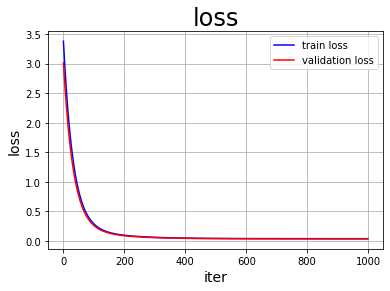

In [2]:
#感知器定义
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w、b的初始值
        
        self.w = np.random.randn(num_of_weights, 1)
        self.b = np.random.random()
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)        
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
        
    def train(self, x, y, vx, vy, iterations=100, eta=0.01):
        losses = []
        validationLoss = []
        for i in range(iterations):
            z = self.forward(x)
            L = self.loss(z, y)
            
            vz = self.forward(vx)
            vL = self.loss(vz, vy)
            
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            validationLoss.append(vL)
            if (i+1) % 50 == 0:
                print('iter {}, loss {}'.format(i, L))
        return losses, validationLoss

# 获取数据
x = trainFeature
y = trainLabel
vx = validationFeature
vy = validationLabel

# 创建网络
net = Network(2)

num_iterations=1000
# 启动训练
losses, validationLoss = net.train(x,y, vx, vy, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plot_vy = np.array(validationLoss)

plt.title("loss", fontsize=24)
plt.xlabel("iter", fontsize=14)
plt.ylabel("loss", fontsize=14)

plt.plot(plot_x, plot_y,color='blue',label='train loss') 
plt.plot(plot_x, plot_vy,color='red',label='validation loss')

plt.grid()
plt.legend()
plt.savefig('12345.jpg')
plt.show()

In [3]:
#测试
testX=testFeature
testY=testLabel.astype(np.int32)
predictY = net.forward(testX)
predictY=np.round(predictY).astype(np.int32)
accuracy=list(testY == predictY).count(True)/testX.shape[0]
print('accuracy=',accuracy,'({}/{})'.format(list(testY == predictY).count(True), testX.shape[0]))

accuracy= 0.98 (196/200)


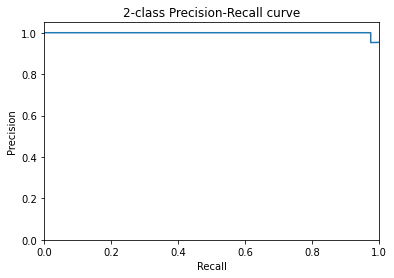

In [4]:
#PR curve
from sklearn.metrics import precision_recall_curve

predictY = net.forward(testX)

y = testY.reshape(-1)

precision, recall, _ = precision_recall_curve(y, predictY, pos_label=1)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.savefig('12345.jpg')
plt.show()

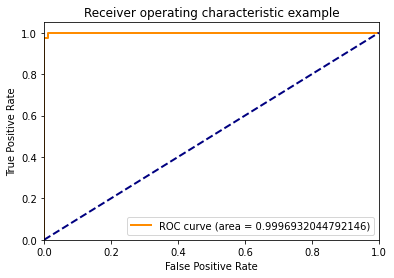

In [5]:
#roc curve
from sklearn.metrics import roc_curve, auc

y = testY.reshape(-1)
scores = net.forward(testX)

fpr, tpr, thresholds = roc_curve(y, scores, pos_label=1)

auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = ' + str(auc) + ')')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('12345.jpg')
plt.show()